#Linear Regression
X = (1, 2, 3, 4, 5)
y = (2, 4, 5, 4, 6)
Our goal is to build a linear regression model that predicts the value of Y based on the value of X.
To do this, we need to find the equation of the line that best fits the data points. The equation of a straight line is given by:
y = mx + b 
where m is the slope of the line, and b is the y-intercept (the point where the line intersects the y-axis).
To find the best values of m and b that fit the data points, we can use the method of least squares. This method involves minimizing the sum of the squared distances between the actual and predicted values of Y for each data point.
The equation for the slope of the line is given by:
m = (nΣxy - ΣxΣy) / (nΣx^2 - (Σx)^2)
where n is the number of data points, Σxy is the sum of the products of X and Y, Σx and Σy are the sums of X and Y, respectively, and Σx^2 is the sum of the squares of X.
The equation for the y-intercept is given by:
b = (Σy - mΣx) / n
Substituting the values from our dataset, we get:
n = 5
Σx = 15
Σy = 21
Σxy = 71
Σx^2 = 55

m = (5*71 - 15*21) / (5*55 - 15^2) = 0.8
b = (21 - 0.8*15) / 5 = 1.8
Therefore, the equation of the line that best fits the data points is:

y = 0.8x + 1.8


#Python Code
Now, let's write some Python code to implement Linear Regression on the same dataset.
We'll be using the scikit-learn library, which provides a simple and easy-to-use interface for implementing various machine learning algorithms.


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# create the dataset
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 6])

# create the linear regression model and fit the data
model = LinearRegression().fit(X, y)

# print the slope and y-intercept
print("Slope: ", model.coef_[0])
print("Y-intercept: ", model.intercept_)

Slope:  0.8000000000000002
Y-intercept:  1.7999999999999998


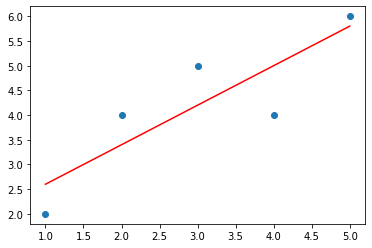

In [2]:
import matplotlib.pyplot as plt

# generate some data points for plotting the regression line
y_pred = model.predict(X)

# plot the data points and regression line
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


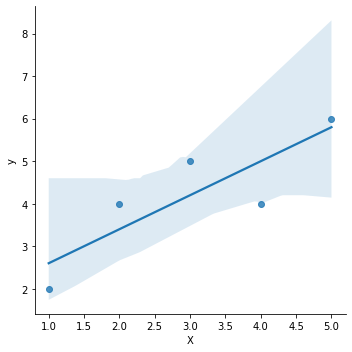

In [3]:
import seaborn as sns
import pandas as pd
# create a DataFrame with the X and y values
df = pd.DataFrame({'X': X.reshape(-1), 'y': y})

# plot the data points and regression line using seaborn
sns.lmplot(x='X', y='y', data=df)
plt.show()


In [4]:
# calculate the R^2 score
r2_score = model.score(X, y)
print("R^2 score: ", r2_score)


R^2 score:  0.7272727272727274


In [5]:
# predict the value of y for a new value of x
x_new = [[6]]
#x_new = np.array([[6]])
y_new = model.predict(x_new)
print("Predicted value of y for x = 6: ", y_new[0])


Predicted value of y for x = 6:  6.6000000000000005


In the code above, we first create the dataset using numpy arrays. Then, we create an instance of the LinearRegression class and fit the data using the fit() method.
We then print the values of the slope and y-intercept using the coef_ and intercept_ attributes of the model object.
Finally, we predict the value of y for a new value of x (6 in this case) using the predict() method and print the result.


#lets do this using statsmodel

In [6]:
import statsmodels.api as sm

# add a constant to X for the intercept term
X = sm.add_constant(X)

# create and fit the OLS model
model_ols = sm.OLS(y, X).fit()

# print the model summary
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     8.000
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0663
Time:                        21:52:20   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8000      0.938      1.919      0.1

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In OLS (Ordinary Least Squares) regression, the P>|t| value represents the p-value associated with the t-statistic for each coefficient in the model.

The t-statistic is calculated by dividing the estimated coefficient by its standard error. The P>|t| value is the probability of observing a t-statistic as extreme as the one computed for the coefficient, assuming that the null hypothesis is true (i.e., the coefficient is equal to zero).

The [0.025, 0.975] interval is known as the confidence interval for the coefficient estimate. It represents a range of values within which we can be confident that the true value of the coefficient lies with a certain level of probability (usually 95%).

Therefore, in simple terms, the P>|t| value indicates the statistical significance of the coefficient estimate. A small P>|t| value (e.g., less than 0.05) suggests that the coefficient is statistically significant, meaning that it is unlikely to have occurred by chance alone. Conversely, a large P>|t| value (e.g., greater than 0.05) suggests that the coefficient is not statistically significant and may have occurred by chance.

The confidence interval [0.025, 0.975] provides a range of plausible values for the true value of the coefficient. If this interval includes zero, then we cannot reject the null hypothesis and conclude that the coefficient is not statistically significant. If the interval does not include zero, then we can reject the null hypothesis and conclude that the coefficient is statistically significant at the given level of probability.